In [25]:
import numpy as np
import pandas as pd
import string
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
#DATASET anglosaxons authors

df=pd.read_csv('top10Poems.csv')

In [37]:
#NUMBER OF TEXTS FOR EACH AUTHOR
df.groupby("author").count()

,text
author,
"Alfred, Lord Tennyson",2318
Algernon Charles Swinburne,2155
Anonymous,2300
Edgar Allan Poe,2500
Howard Phillips Lovecraft,2500
Mary Wollstonecraft Shelley,2500
Percy Bysshe Shelley,2301
Walt Whitman,2251
William Shakespeare,2143


In [38]:
authors=list(df["author"].unique())

In [39]:
medium_lengths=[] #inside it we store the medium lenght of texts belonging to each author

for a in authors:
    l=0
    for i in range(len(df)):
        if(df.loc[i]["author"]==a):
            l+=(len(df.loc[i]["text"]))
    medium_lengths.append(l/len(df[df["author"]==a]))
    print("author : ",a," medium_length of texts : ",l/len(df[df["author"]==a]))

author :  William Wordsworth  medium_length of texts :  71.06550868486353
author :  Percy Bysshe Shelley  medium_length of texts :  72.30595393307257
author :  William Shakespeare  medium_length of texts :  54.29071395240317
author :  Alfred, Lord Tennyson  medium_length of texts :  82.51078515962037
author :  Algernon Charles Swinburne  medium_length of texts :  78.62041763341067
author :  Anonymous  medium_length of texts :  98.42391304347827
author :  Walt Whitman  medium_length of texts :  80.04042647712127
author :  Edgar Allan Poe  medium_length of texts :  143.7376
author :  Howard Phillips Lovecraft  medium_length of texts :  154.5392
author :  Mary Wollstonecraft Shelley  medium_length of texts :  151.5224


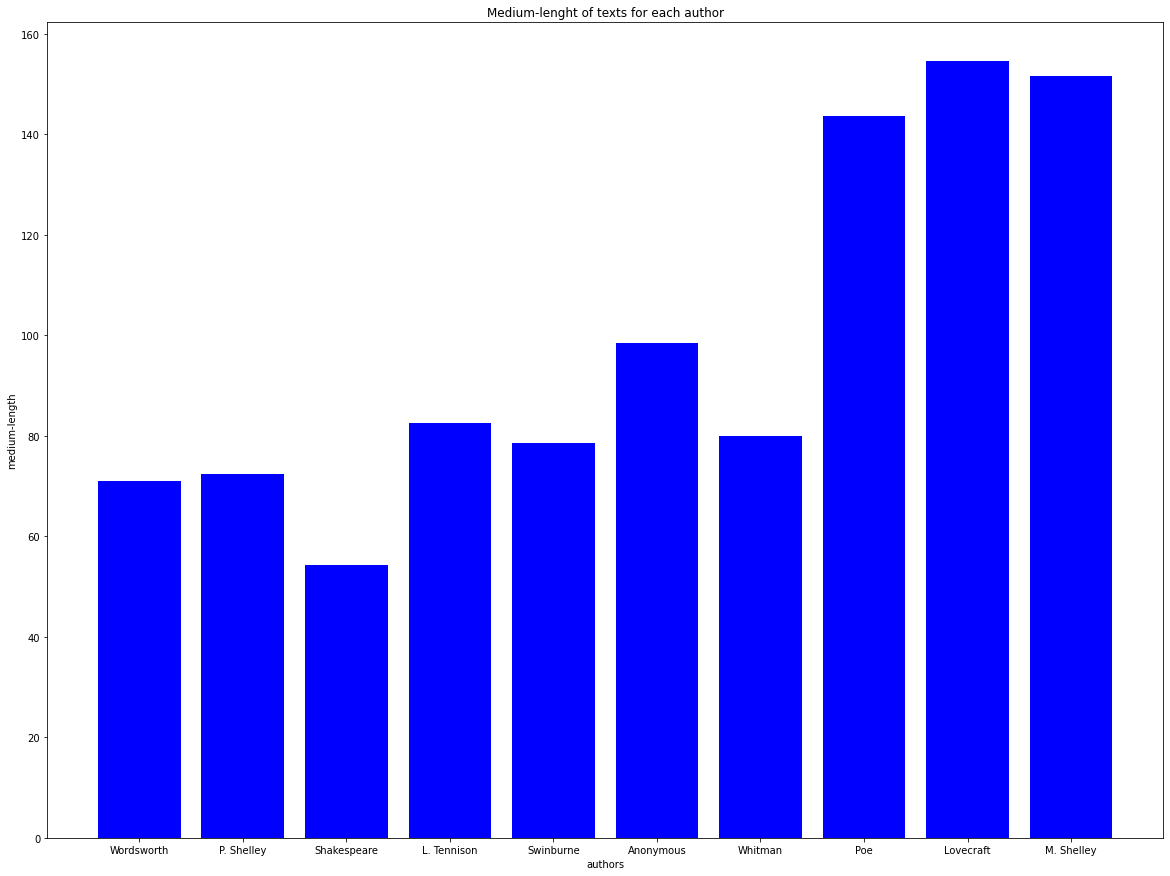

In [40]:
import matplotlib.pyplot as plt
  
# x-coordinates of left sides of bars 
left = authors
  
# heights of bars
height = medium_lengths
  
# labels for bars
tick_label = ["Wordsworth","P. Shelley","Shakespeare","L. Tennison","Swinburne","Anonymous","Whitman","Poe","Lovecraft","M. Shelley"]


fig, ax = plt.subplots(figsize=(20,15))

# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['blue'])
  
# naming the x-axis
plt.xlabel('authors')
# naming the y-axis
plt.ylabel('medium-length')
# plot title
plt.title('Medium-lenght of texts for each author')

# function to show the plot
plt.show()

### **PREPROCESSING DEI DATI**
Il NLP(o Elaborazione del Linguaggio Naturale) è il processo che si occupa di trattare in maniera automatica il linguaggio naturale cercando di fronteggiare i problemi che lo caratterizzano.
In virtù del fatto che è naturale, il linguaggio non presenta regolarità e strutture facili da trattare in maniera automatica.
Inoltre una macchina non estrae conoscenza da un testo allo stesso modo con cui lo fa un essere umano.
Pertanto il testo scritto, che in questo caso rappresenta i dati, va modificato in maniera tale da essere reso più facilmente processabile dal modello di apprendimento automatico.
Ogni tecnica di preprocessing consiste nel modificare i dati aggiungendo le informazioni utili ed eliminando quelle superflue.Lo scopo di queste modifiche è quello di favorire l’apprendimento del modello fornendogli dati di maggiore qualità.
In seguito sono descritte alcune tecniche di data preprocessing.



**Tokenizazzione**

Un testo per essere processato ha bisogno di essere scomposto in più parti.
Solitamente queste parti o tokens sono rappresentate dalle parole o dalle frasi in un testo (in alcuni casi anche da porzioni di parole).

Effettuiamo una tokenizzazione per parole basandoci su un dizionario.

In [41]:
nltk.download('punkt')

df['tokenized_sents'] = df.apply(lambda row: nltk.word_tokenize(row["text"]), axis=1)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**Pos-Tagging**

Il Pos-Tagging(Part-Of-Speech tagging) effettua una pseudo analisi grammaticale/sintattica di un testo e quindi
attribuisce ad ogni parola all’interno di esso un tag(etichetta) che ne identifica il ruolo all’interno del
discorso.

La libreria nltk fa riferimento alla risorsa linguistica 'Treebank' per effettuare pos-tagging.

In [42]:
nltk.download('averaged_perceptron_tagger')

df['tokenized_sents'] = df['tokenized_sents'].apply(lambda x: pos_tag(x))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


**Conversione della grafia**

Passiamo tutte le lettere scritte in maiuscolo nella forma minuscola.

In [43]:
def listOfLists(L):
  newL=[]
  for t in L:
    newL.append(list(t))
  return newL

def toLowerCase(L):
  for l in L:
    l[0]=l[0].lower()
  return L

#trasformazione da lista di tuple a lista di liste
df['tokenized_sents']=df['tokenized_sents'].apply(lambda x: listOfLists(x))

#trasformazione dei token in lower-case
df['tokenized_sents']=df['tokenized_sents'].apply(lambda x: toLowerCase(x))

**Rimozione dei rumori**

Rimuoviamo dal testo rumori come segni di punteggiatura,spazi...



Effettuiamo le due operazioni contemporaneamente.

In [44]:
#solo rimozione di rumori(punteggiatura e spazi vuoti)

def removeSublist(a,b):
  for el in b:
    a.remove(el)

noises_list=list(string.punctuation)+[" "]+[""]

df['tokenized_sents'].apply(lambda x: removeSublist(x,[couple for couple in x if not(set(couple[0]).isdisjoint(noises_list))]))

0        None
1        None
2        None
3        None
4        None
         ... 
22978    None
22979    None
22980    None
22981    None
22982    None
Name: tokenized_sents, Length: 22983, dtype: object

In [45]:
df['tokenized_sents']

0        [[who, WP], [is, VBZ], [the, DT], [happy, JJ],...
1        [[wish, NN], [to, TO], [be, VB], [—it, NN], [i...
2        [[the, DT], [tasks, NNS], [of, IN], [real, JJ]...
3        [[thought, NN], [whose, JJ], [high, JJ], [ende...
4        [[always, RB], [bright, VBN], [who, WP], [with...
                               ...                        
22978    [[i, PRP], [need, VBP], [not, RB], [conjure, V...
22979    [[the, DT], [apprehension, NN], [that, IN], [r...
22980    [[i, PRP], [will, MD], [not, RB], [live, VB], ...
22981    [[after, IN], [the, DT], [departure, NN], [of,...
22982    [[reproach, NNP], [is, VBZ], [indeed, RB], [an...
Name: tokenized_sents, Length: 22983, dtype: object

**Lemmatizzazione**

Si va a sostituire ogni parola con la sua forma base. Quest'utlima è anch’essa una parola(di senso compiuto) e solitamente si trova all’interno dei
dizionari. Per una parola potremmo avere più lemmi a seconda del suo Pos-Tag. Utilizzeremo un algoritmo che effettua Lemmatizzazione basandosi sul Pos-Tag.

Essendo il pos-tagging di 'wordnet' diverso da quello usato finora (della libreria 'nltk') basato su treebank,effettuiamo un mapping tra i pos-tags di 'treebank' e quelli di 'wordnet'.

NOTA: il pos-tagging di wordnet è meno dettagliato di quello di nltk quindi posso mappare i pos-tags del secondo verso quelli del primo.

In [46]:
#Lemmatizzazione in base al Pos-Tag
#Attenzione funziona solo con #codice per POS-TAG

nltk.download('wordnet')

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.tokenize import word_tokenize

def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return 0

lemmatizer = WordNetLemmatizer()

def lemmatizeToken(L):
  for i in range(len(L)):
    if(get_wordnet_pos(L[i][1])!=0):
      L[i][0]=lemmatizer.lemmatize(L[i][0],pos=get_wordnet_pos(L[i][1]))
  return L

df["tokenized_sents"]=df['tokenized_sents'].apply(lambda x: lemmatizeToken(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [55]:
lemmatizer.lemmatize("going",get_wordnet_pos("NN"))

'going'

In [12]:
#concateno ogni lemma con ogni pos-tag

df["tokenized_sents"]=df["tokenized_sents"].apply(lambda x: ' '.join([el[0]+el[1] for el in x]))

# **VETTORIZZAZIONE CON TF-IDF**

Utilizziamo la metrica TF-IDF per convertire il testo in un formato numerico facendo emergere termini specifici e pesando diversamente i termini molto rari o molto comuni in modo da assegnare loro un punteggio basso.
TF sta per term frequency, mentre IDF sta per inverse document frequency.
Il valore TF-IDF legato ad una parola(o token) aumenta proporzionalmente al numero di volte che questa appare nel documento ed è compensato dal numero di documenti nel corpus che la contengono.Se una parola è contenuta in molti documenti allora è probabile che quella non sia una parola altamente specifica per il documento.
Nell'algorimo basato su TF-IDF non viene codificato l'ordine dei token all'interno di un testo e ciò causa un ulteriore perdita di informazione oltre a quella generata dal preprocessing.
Nell'effettuare la conversione questo algoritmo codifica l'informazione che descrive l'importanza di una parola all'interno di un testo facente parte di un insieme di documenti su cui il modello verrà addestrato.

Con questo tipo di vettorizzazione stiamo estraendo dal testo delle features di tipo lessicale.

In [13]:
# initialize the Vectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
# apply Tf-Idf
data_vectorized = vectorizer.fit_transform(df['tokenized_sents'])
# Store the vectorized data inside X
X=data_vectorized.toarray()

**Vettorizzazione delle classi target**

Trasformiamo le classi target ,rappresentate dagli autori, da stringhe a numeri.


In [14]:
Y=np.empty((len(df),1)) #sarà il vettore delle classi target
Y

authors=df["author"].unique() #insieme degli autori

targets=np.array(df["author"])

for i in range (len(df)):
  Y[i]=np.where(authors == targets[i])[0][0]

Y=Y.astype("int")
Y

array([[0],
       [0],
       [0],
       ...,
       [9],
       [9],
       [9]])

\begin{array}{ccc}
idTarget&Autore\\
0         & William Wordsworth          \\
1         & Percy Bysshe Shelley        \\
2         & William Shakespeare         \\
3         & Alfred, Lord Tennyson       \\
4         & Algernon Charles Swinburne  \\
5         & Anonymous                   \\
6         & Walt Whitman                \\
7         & Edgar Allan Poe             \\
8         & Howard Phillips Lovecraft   \\
9         & Mary Wallstonecraft Shelley   \\
\end{array}

**Splitting dei dati**

Il dataset viene diviso in training set (70%) e test set (30%)

In [15]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.3)

In [16]:
print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(16088, 8023) (6895, 8023)
(16088, 1) (6895, 1)


In [17]:
print("Xtrain",type(X_train))
print("Ytrain",type(Y_train))
print("Xtest",type(X_test))
print("Ytest",type(Y_test))
print("Xtrain",X_train.dtype)
print("Ytrain",Y_train.dtype)
print("Xtest",X_test.dtype)
print("Ytest",Y_test.dtype)

Xtrain <class 'numpy.ndarray'>
Ytrain <class 'numpy.ndarray'>
Xtest <class 'numpy.ndarray'>
Ytest <class 'numpy.ndarray'>
Xtrain float64
Ytrain int64
Xtest float64
Ytest int64


Addestriamo un modello di tipo Multinomial Naive Bayes fornendogli il training set

In [18]:
#import models and evaluation functions

from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB, ComplementNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [19]:
# definiamo il modello Multinomial Naive Bayes
MultinomialNB_model = MultinomialNB(alpha=0.01)

# addestramento
MultinomialNB_model.fit(X_train, Y_train)

# predizioni (fase di test)
Y_pred = MultinomialNB_model.predict(X_test)
print(classification_report(Y_test, Y_pred, target_names=authors))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                             precision    recall  f1-score   support

         William Wordsworth       0.43      0.37      0.40       612
       Percy Bysshe Shelley       0.51      0.48      0.50       689
        William Shakespeare       0.57      0.44      0.50       662
      Alfred, Lord Tennyson       0.53      0.52      0.52       696
 Algernon Charles Swinburne       0.55      0.61      0.58       612
                  Anonymous       0.92      0.85      0.89       636
               Walt Whitman       0.62      0.55      0.58       675
            Edgar Allan Poe       0.60      0.67      0.63       764
  Howard Phillips Lovecraft       0.63      0.73      0.68       780
Mary Wollstonecraft Shelley       0.58      0.71      0.64       769

                   accuracy                           0.60      6895
                  macro avg       0.60      0.59      0.59      6895
               weighted avg       0.60      0.60      0.59      6895



In [20]:
# define the Bernoulli Naive Bayes model
BernoulliNB_model = BernoulliNB(alpha=0.01)

# train
BernoulliNB_model.fit(X_train, Y_train)

# predict
Y_pred = BernoulliNB_model.predict(X_test)
print(classification_report(Y_test, Y_pred, target_names=authors))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                             precision    recall  f1-score   support

         William Wordsworth       0.42      0.43      0.43       612
       Percy Bysshe Shelley       0.51      0.51      0.51       689
        William Shakespeare       0.56      0.54      0.55       662
      Alfred, Lord Tennyson       0.52      0.55      0.54       696
 Algernon Charles Swinburne       0.55      0.64      0.59       612
                  Anonymous       0.90      0.86      0.88       636
               Walt Whitman       0.61      0.61      0.61       675
            Edgar Allan Poe       0.65      0.62      0.63       764
  Howard Phillips Lovecraft       0.74      0.72      0.73       780
Mary Wollstonecraft Shelley       0.73      0.68      0.70       769

                   accuracy                           0.62      6895
                  macro avg       0.62      0.62      0.62      6895
               weighted avg       0.62      0.62      0.62      6895



In [21]:
# define the Gaussian Naive Bayes model
GaussianNB_model = GaussianNB()

# train
GaussianNB_model.fit(X_train, Y_train)

# predict
Y_pred = GaussianNB_model.predict(X_test)
print(classification_report(Y_test, Y_pred, target_names=authors))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                             precision    recall  f1-score   support

         William Wordsworth       0.36      0.33      0.34       612
       Percy Bysshe Shelley       0.42      0.26      0.32       689
        William Shakespeare       0.36      0.48      0.41       662
      Alfred, Lord Tennyson       0.48      0.38      0.42       696
 Algernon Charles Swinburne       0.37      0.48      0.42       612
                  Anonymous       0.75      0.78      0.76       636
               Walt Whitman       0.49      0.34      0.40       675
            Edgar Allan Poe       0.48      0.56      0.52       764
  Howard Phillips Lovecraft       0.56      0.59      0.57       780
Mary Wollstonecraft Shelley       0.50      0.56      0.53       769

                   accuracy                           0.48      6895
                  macro avg       0.48      0.48      0.47      6895
               weighted avg       0.48      0.48      0.47      6895



In [22]:
# define the Complement Naive Bayes model
ComplementNB_model = ComplementNB(alpha=0.01)

# train
ComplementNB_model.fit(X_train, Y_train)

# predict
Y_pred = ComplementNB_model.predict(X_test)
print(classification_report(Y_test, Y_pred, target_names=authors))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                             precision    recall  f1-score   support

         William Wordsworth       0.45      0.33      0.38       612
       Percy Bysshe Shelley       0.47      0.41      0.44       689
        William Shakespeare       0.55      0.38      0.45       662
      Alfred, Lord Tennyson       0.53      0.48      0.50       696
 Algernon Charles Swinburne       0.48      0.59      0.53       612
                  Anonymous       0.76      0.90      0.83       636
               Walt Whitman       0.56      0.52      0.54       675
            Edgar Allan Poe       0.58      0.65      0.61       764
  Howard Phillips Lovecraft       0.59      0.70      0.64       780
Mary Wollstonecraft Shelley       0.58      0.64      0.61       769

                   accuracy                           0.56      6895
                  macro avg       0.55      0.56      0.55      6895
               weighted avg       0.56      0.56      0.56      6895



Looking at the various classification report we can see that the best accuracies are obtained by BernoulliNB,MultinomialNB and ComplementNB.

These models are all characterised by a smoothing parameter (alpha).

In order to find the best parameters for these three models we are going to train and test them on different alphas.

Models will be evaluated on macro avg.

In [23]:
import numpy as np
from sklearn.metrics import precision_score

import warnings
warnings.filterwarnings("ignore")

# fill the lists with plausible values
alpha_list=np.arange(start=0.01,stop=0.99,step=0.01)

# define lists for storing the evaluations

alphas=[]

BernoulliNB_f1s = []
MultinomialNB_f1s=[]
ComplementNB_f1s=[]


for alpha in alpha_list:

    alphas.append(alpha)

    #BernoulliNB
    BernoulliNB_model = BernoulliNB(alpha=alpha)  #initialize
    BernoulliNB_model.fit(X_train, Y_train)
    Y_pred = BernoulliNB_model.predict(X_test)
    f1_score=classification_report(Y_test, Y_pred, target_names=authors,output_dict=True)["macro avg"]["f1-score"]
    BernoulliNB_f1s.append(f1_score)

    #MultinomialNB
    MultinomialNB_model = MultinomialNB(alpha=alpha)  #initialize
    MultinomialNB_model.fit(X_train, Y_train)
    Y_pred = MultinomialNB_model.predict(X_test)
    f1_score=classification_report(Y_test, Y_pred, target_names=authors,output_dict=True)["macro avg"]["f1-score"]
    MultinomialNB_f1s.append(f1_score)

  #ComplementNB
    ComplementNB_model = ComplementNB(alpha=alpha)  #initialize
    ComplementNB_model.fit(X_train, Y_train)
    Y_pred = ComplementNB_model.predict(X_test)
    f1_score=classification_report(Y_test, Y_pred, target_names=authors,output_dict=True)["macro avg"]["f1-score"]
    ComplementNB_f1s.append(f1_score)

In [24]:
scores_df = pd.DataFrame({
    "alphas":alphas,
    "BernoulliNB_f1s":BernoulliNB_f1s,
    "MultinomialNB_f1s":MultinomialNB_f1s,
    "ComplementNB_f1s":ComplementNB_f1s
})

#scores_df.sort_values(by=['MultinomialNB_f1s'])

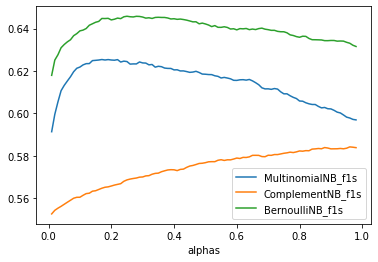

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

scores_df.plot(x="alphas", y=["MultinomialNB_f1s","ComplementNB_f1s","BernoulliNB_f1s"])

plt.show()

The best macro avg is obtained for similar values of alpha (that are around 0.2) for BernoulliNB and MultinomialNB.

Differently, for ComplementNB the macroavg get better as the alpha's value increases.

So, get the best alpha for each model and compare them...

In [26]:
#scores_df.sort_values(by=['MultinomialNB_f1s']).loc[1]["alpha","MultinomialNB_f1s"]
MultinomialNB_param = scores_df.sort_values(by=['MultinomialNB_f1s']).tail(1)[["alphas","MultinomialNB_f1s"]]
ComplementNB_param = scores_df.sort_values(by=['ComplementNB_f1s']).tail(1)[["alphas","ComplementNB_f1s"]]
BernoulliNB_param = scores_df.sort_values(by=['BernoulliNB_f1s']).tail(1)[["alphas","BernoulliNB_f1s"]]


In [27]:
display(MultinomialNB_param)
display(BernoulliNB_param)
display(ComplementNB_param)

,alphas,MultinomialNB_f1s
16,0.17,0.625394


,alphas,BernoulliNB_f1s
24,0.25,0.645772


,alphas,ComplementNB_f1s
95,0.96,0.584269


So , the best macroavg is obtained on this dataset by BernoulliNB(alpha=0.19).

Let's examine better the classification performed by the four models used by plotting the respectives confusion matrices.

In [28]:
authors

array(['William Wordsworth', 'Percy Bysshe Shelley',
       'William Shakespeare', 'Alfred, Lord Tennyson',
       'Algernon Charles Swinburne', 'Anonymous', 'Walt Whitman',
       'Edgar Allan Poe', 'Howard Phillips Lovecraft',
       'Mary Wollstonecraft Shelley'], dtype=object)

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [62]:
authors

array(['William Wordsworth', 'Percy Bysshe Shelley',
       'William Shakespeare', 'Alfred, Lord Tennyson',
       'Algernon Charles Swinburne', 'Anonymous', 'Walt Whitman',
       'Edgar Allan Poe', 'Howard Phillips Lovecraft',
       'Mary Wollstonecraft Shelley'], dtype=object)

In [30]:
short_authors = ["Wordsworth","P. Shelley","Shakespeare","L. Tennison","Swinburne","Anonymous","Whitman","Poe","Lovecraft","M. Shelley"]

<AxesSubplot:title={'center':'ComplementNB(alpha=0.98)'}>

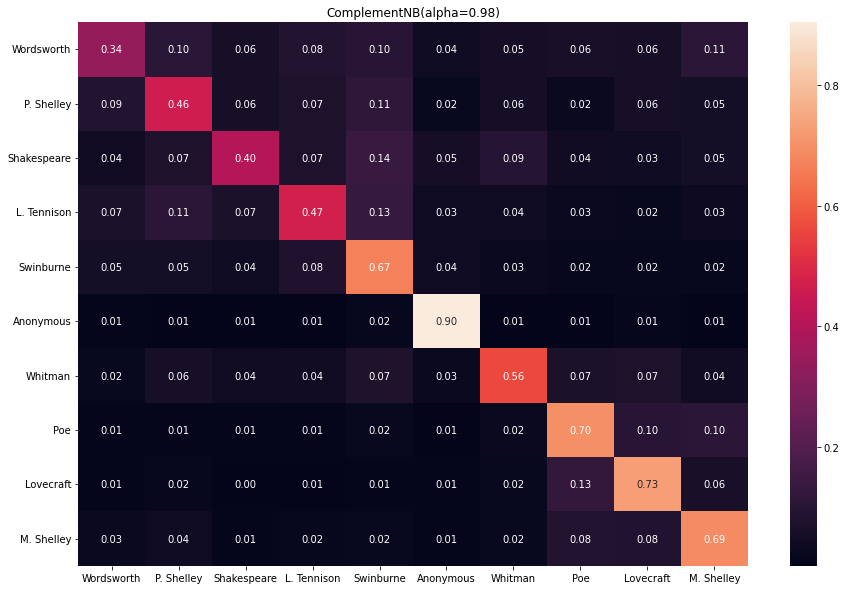

In [58]:
# define the Complement Naive Bayes model
ComplementNB_model = ComplementNB(alpha=0.98)

# train
ComplementNB_model.fit(X_train, Y_train)

# predict
Y_pred = ComplementNB_model.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(15,10))
ax.set_title('ComplementNB(alpha=0.98)')
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=short_authors, yticklabels=short_authors)

<AxesSubplot:title={'center':'GaussianNB'}>

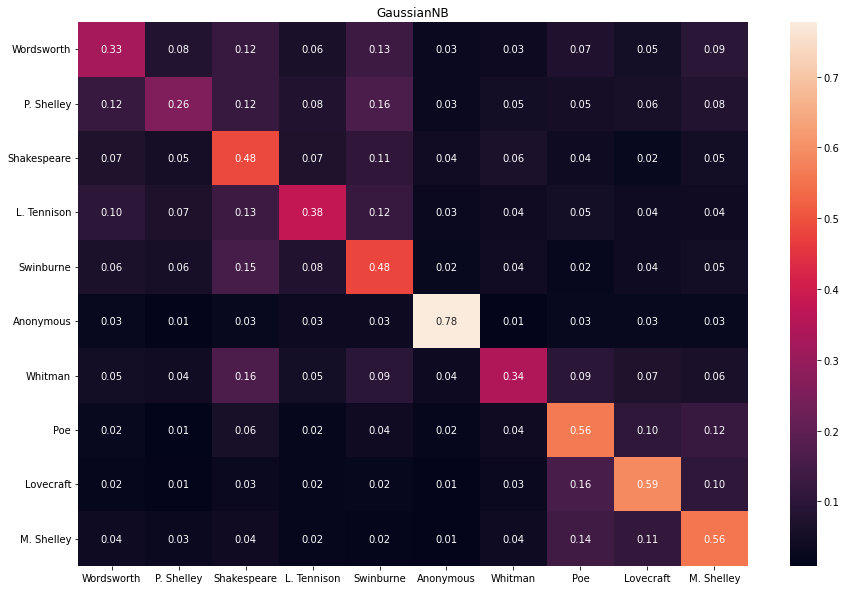

In [59]:
# define the Gaussian Naive Bayes model
GaussianNB_model = GaussianNB()

# train
GaussianNB_model.fit(X_train, Y_train)

# predict
Y_pred = GaussianNB_model.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(15,10))
ax.set_title('GaussianNB')
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=short_authors, yticklabels=short_authors)

<AxesSubplot:title={'center':'BernoulliNB(alpha=0.22)'}>

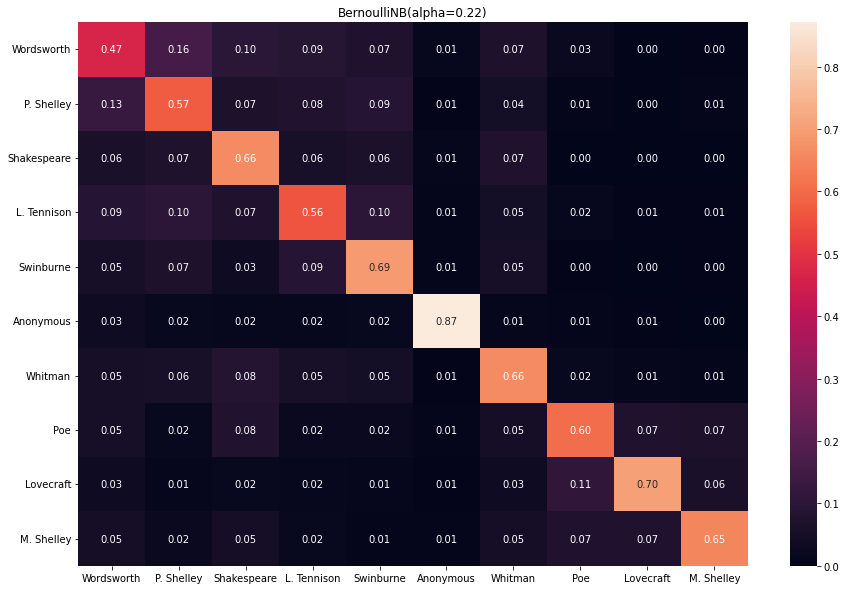

In [60]:
# define the Bernoulli Naive Bayes model
BernoulliNB_model = BernoulliNB(alpha=0.22)

# train
BernoulliNB_model.fit(X_train, Y_train)

# predict
Y_pred = BernoulliNB_model.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(15,10))
ax.set_title('BernoulliNB(alpha=0.22)')
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=short_authors, yticklabels=short_authors)

<AxesSubplot:title={'center':'MultinomialNB(alpha=0.19)'}>

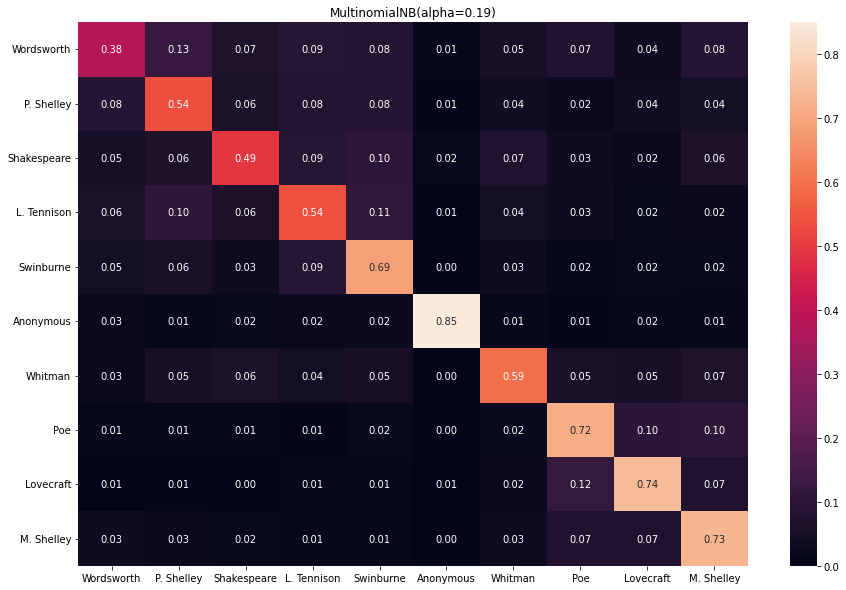

In [61]:
# define the Multinomial Naive Bayes model
MultinomialNB_model = MultinomialNB(alpha=0.19)

# train
MultinomialNB_model.fit(X_train, Y_train)

# predict
Y_pred = MultinomialNB_model.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(15,10))
ax.set_title('MultinomialNB(alpha=0.19)')
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=short_authors, yticklabels=short_authors)

Now we are going to perform AA from another perspective.
Since we want to analyze authors by looking at subjects and topics threated by them, we will perform a sematic annotation.

In fact, we will annotate texts by tagging words with NER in order to show the entity to which a particular word refers.


# **Annotazione Semantica**

Piuttosto che annotare il testo da un punto di vista sintattico (feature sintattiche), in questo caso si effettua un'annotazione di tipo semantico in quanto si va a ricercare all'interno del testo la presenza di entità (come persone(PERSON),Entità Geopolitiche(GPE),Luoghi(LOC),Date(DATE),Avvenimenti(EV),denaro(MONEY) e altre).

Diversamente dal pos-tagging che viene usato per riflettere il modo di scrivere dell'autore, questo tipo di annotazione non è stilistica.

Tuttavia le feature che emergono dall'annotazione semantica possono in qualche modo essere ricondotte allo stile poiché fanno riguardano ai contenuti dell'autore.

Ad esempio nei testi di uno scrittore che tratta temi storico/politici possono essere spesso citate entità geografiche,denaro,eventi e date.

Un poeta potrebbe invece citare la natura,persone o cose che fanno riferimento all'arte.

Per l'annotazione semantica verranno usate le funzioni della libreria Spacy.

A seguire sono riportate le tag-entity usate da spacy:

**PERSON:**      People, including fictional.

**NORP:**        Nationalities or religious or political groups.

**FAC:**         Buildings, airports, highways, bridges, etc.

**ORG:**         Companies, agencies, institutions, etc.

**GPE:**         Countries, cities, states.

**LOC:**         Non-GPE locations, mountain ranges, bodies of water.

**PRODUCT:**     Objects, vehicles, foods, etc. (Not services.)

**EVENT:**       Named hurricanes, battles, wars, sports events, etc.

**WORK_OF_ART:** Titles of books, songs, etc.

**LAW:**         Named documents made into laws.

**LANGUAGE:**    Any named language.

**DATE:**        Absolute or relative dates or periods.

**TIME:**        Times smaller than a day.

**PERCENT:**     Percentage, including ”%“.

**MONEY:**       Monetary values, including unit.

**QUANTITY:**    Measurements, as of weight or distance.

**ORDINAL:**     “first”, “second”, etc.

**CARDINAL:**    Numerals that do not fall under another type.

In [103]:
import spacy
from spacy import displacy

In [104]:
df=pd.read_csv('top10Poems.csv')

In [105]:
#Se sono presenti parole all'interno di ogni testo, che fanno riferimento ad entità
#la funzione semantic_tag assegna uno specifico tag a queste

nlp = spacy.load("en_core_web_sm")

def semantic_tag(text):

  doc = nlp(text)

  enriched_text = []

  for token in doc:
      if token.ent_type:
          enriched_text.append(token.text)
          enriched_text.append(token.ent_type_)
      else:
        enriched_text.append(token.text)

  return enriched_text

In [106]:
df["text"] = df['text'].apply(lambda x: semantic_tag(x))

In [107]:
#noises and stopwords removal

nltk.download('stopwords')

stop_list = stopwords.words('english')+list(string.punctuation)+[" "]+[""] #noise removal:insieme alle stopwords viene eliminata la punteggiatura

print(stop_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [108]:
df['text'] = df['text'].apply(lambda x: ' '.join([token for token in x if token not in (stop_list)]))

In [112]:
# initialize the Vectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
# apply Tf-Idf
data_vectorized = vectorizer.fit_transform(df['text'])
# Store the vectorized data inside X
X=data_vectorized.toarray()

In [113]:
print(X.shape)

(22983, 7395)


In [114]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.3)

In [115]:
import numpy as np
from sklearn.metrics import precision_score

import warnings
warnings.filterwarnings("ignore")

# fill the lists with plausible values
alpha_list=np.arange(start=0.01,stop=0.99,step=0.01)

# define lists for storing the evaluations

alphas=[]

BernoulliNB_f1s = []
MultinomialNB_f1s=[]
ComplementNB_f1s=[]


for alpha in alpha_list:

    alphas.append(alpha)

    #BernoulliNB
    BernoulliNB_model = BernoulliNB(alpha=alpha)  #initialize
    BernoulliNB_model.fit(X_train, Y_train)
    Y_pred = BernoulliNB_model.predict(X_test)
    f1_score=classification_report(Y_test, Y_pred, target_names=authors,output_dict=True)["macro avg"]["f1-score"]
    BernoulliNB_f1s.append(f1_score)

    #MultinomialNB
    MultinomialNB_model = MultinomialNB(alpha=alpha)  #initialize
    MultinomialNB_model.fit(X_train, Y_train)
    Y_pred = MultinomialNB_model.predict(X_test)
    f1_score=classification_report(Y_test, Y_pred, target_names=authors,output_dict=True)["macro avg"]["f1-score"]
    MultinomialNB_f1s.append(f1_score)

  #ComplementNB
    ComplementNB_model = ComplementNB(alpha=alpha)  #initialize
    ComplementNB_model.fit(X_train, Y_train)
    Y_pred = ComplementNB_model.predict(X_test)
    f1_score=classification_report(Y_test, Y_pred, target_names=authors,output_dict=True)["macro avg"]["f1-score"]
    ComplementNB_f1s.append(f1_score)

In [116]:
synt_scores_df = scores_df

semantic_scores_df = pd.DataFrame({
    "alphas":alphas,
    "BernoulliNB_f1s":BernoulliNB_f1s,
    "MultinomialNB_f1s":MultinomialNB_f1s,
    "ComplementNB_f1s":ComplementNB_f1s
})

#scores_df.sort_values(by=['MultinomialNB_f1s'])

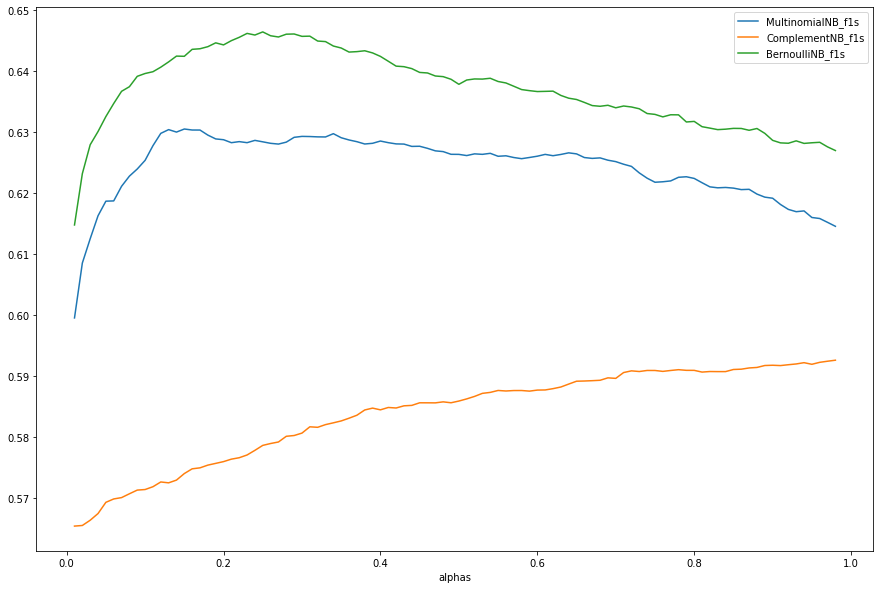

In [117]:
import matplotlib.pyplot as plt
import pandas as pd

semantic_scores_df.plot(x="alphas", y=["MultinomialNB_f1s","ComplementNB_f1s","BernoulliNB_f1s"])

plt.show()

Similarly to previous preprocessing, we observe that the model's performances change in the same mode as we vary the value of alpha

In [118]:
#scores_df.sort_values(by=['MultinomialNB_f1s']).loc[1]["alpha","MultinomialNB_f1s"]
MultinomialNB_param = semantic_scores_df.sort_values(by=['MultinomialNB_f1s']).tail(1)[["alphas","MultinomialNB_f1s"]]
ComplementNB_param = semantic_scores_df.sort_values(by=['ComplementNB_f1s']).tail(1)[["alphas","ComplementNB_f1s"]]
BernoulliNB_param = semantic_scores_df.sort_values(by=['BernoulliNB_f1s']).tail(1)[["alphas","BernoulliNB_f1s"]]

In [119]:
display(MultinomialNB_param)
display(BernoulliNB_param)
display(ComplementNB_param)

,alphas,MultinomialNB_f1s
14,0.15,0.630535


,alphas,BernoulliNB_f1s
24,0.25,0.64646


,alphas,ComplementNB_f1s
97,0.98,0.59262


                             precision    recall  f1-score   support

         William Wordsworth       0.55      0.33      0.41       616
       Percy Bysshe Shelley       0.50      0.54      0.52       664
        William Shakespeare       0.53      0.42      0.47       655
      Alfred, Lord Tennyson       0.59      0.55      0.57       707
 Algernon Charles Swinburne       0.54      0.67      0.60       683
                  Anonymous       0.84      0.94      0.89       690
               Walt Whitman       0.57      0.47      0.51       637
            Edgar Allan Poe       0.60      0.68      0.64       741
  Howard Phillips Lovecraft       0.65      0.72      0.68       743
Mary Wollstonecraft Shelley       0.60      0.67      0.63       759

                   accuracy                           0.60      6895
                  macro avg       0.60      0.60      0.59      6895
               weighted avg       0.60      0.60      0.60      6895



<AxesSubplot:title={'center':'ComplementNB(alpha=0.98)'}>

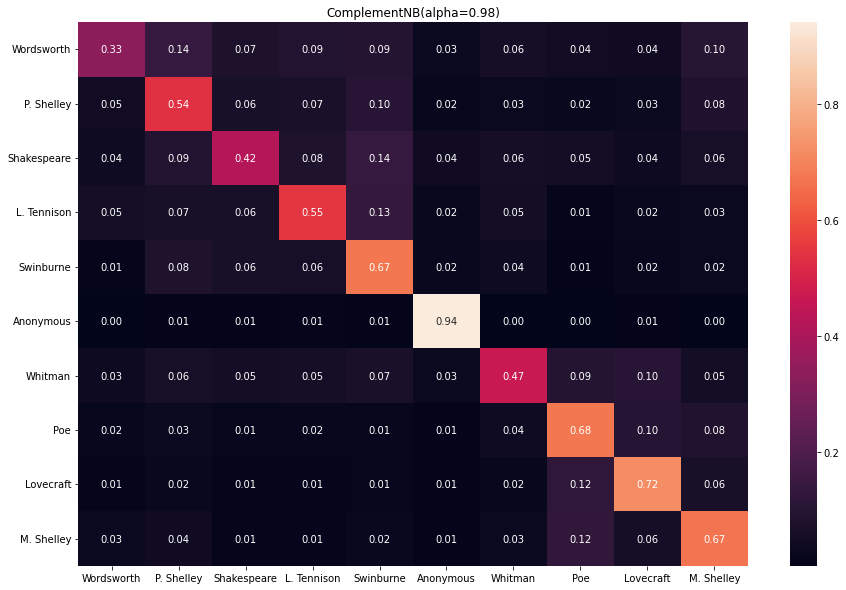

In [125]:
# define the Complement Naive Bayes model
ComplementNB_model = ComplementNB(alpha=0.96)

# train
ComplementNB_model.fit(X_train, Y_train)

# predict
Y_pred = ComplementNB_model.predict(X_test)

print(classification_report(Y_test, Y_pred, target_names=authors))

cm = confusion_matrix(Y_test, Y_pred)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(15,10))
ax.set_title('ComplementNB(alpha=0.98)')
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=short_authors, yticklabels=short_authors)

                             precision    recall  f1-score   support

         William Wordsworth       0.47      0.45      0.46       616
       Percy Bysshe Shelley       0.52      0.64      0.57       664
        William Shakespeare       0.49      0.65      0.55       655
      Alfred, Lord Tennyson       0.62      0.56      0.59       707
 Algernon Charles Swinburne       0.61      0.68      0.64       683
                  Anonymous       0.98      0.89      0.93       690
               Walt Whitman       0.56      0.65      0.60       637
            Edgar Allan Poe       0.71      0.60      0.65       741
  Howard Phillips Lovecraft       0.85      0.67      0.75       743
Mary Wollstonecraft Shelley       0.78      0.65      0.71       759

                   accuracy                           0.65      6895
                  macro avg       0.66      0.64      0.65      6895
               weighted avg       0.67      0.65      0.65      6895



<AxesSubplot:title={'center':'BernoulliNB(alpha=0.22)'}>

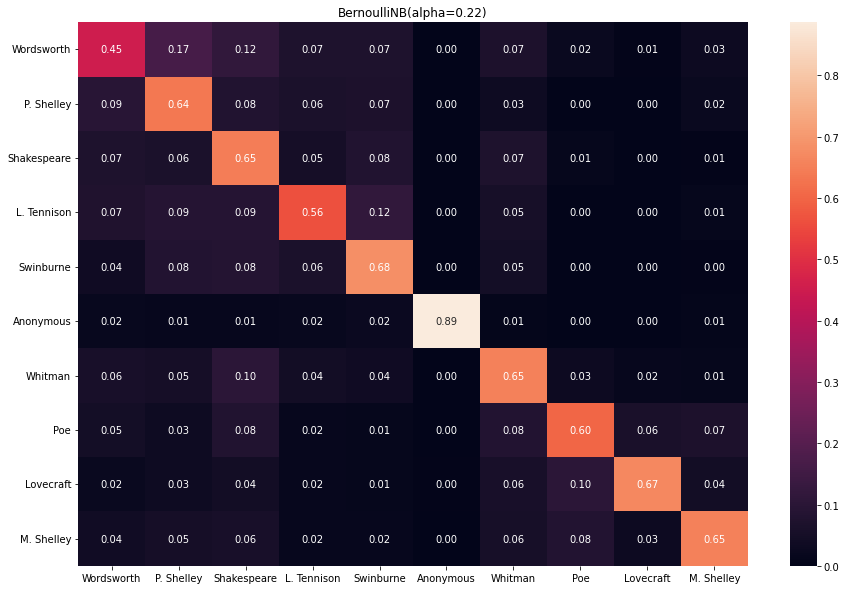

In [126]:
# define the Bernoulli Naive Bayes model
BernoulliNB_model = BernoulliNB(alpha=0.25)

# train
BernoulliNB_model.fit(X_train, Y_train)

# predict
Y_pred = BernoulliNB_model.predict(X_test)

print(classification_report(Y_test, Y_pred, target_names=authors))

cm = confusion_matrix(Y_test, Y_pred)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(15,10))
ax.set_title('BernoulliNB(alpha=0.22)')
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=short_authors, yticklabels=short_authors)

                             precision    recall  f1-score   support

         William Wordsworth       0.52      0.39      0.44       616
       Percy Bysshe Shelley       0.51      0.64      0.56       664
        William Shakespeare       0.55      0.48      0.51       655
      Alfred, Lord Tennyson       0.58      0.60      0.59       707
 Algernon Charles Swinburne       0.59      0.67      0.63       683
                  Anonymous       0.96      0.89      0.92       690
               Walt Whitman       0.62      0.55      0.58       637
            Edgar Allan Poe       0.66      0.66      0.66       741
  Howard Phillips Lovecraft       0.74      0.73      0.73       743
Mary Wollstonecraft Shelley       0.65      0.71      0.67       759

                   accuracy                           0.64      6895
                  macro avg       0.64      0.63      0.63      6895
               weighted avg       0.64      0.64      0.63      6895



<AxesSubplot:title={'center':'MultinomialNB(alpha=0.19)'}>

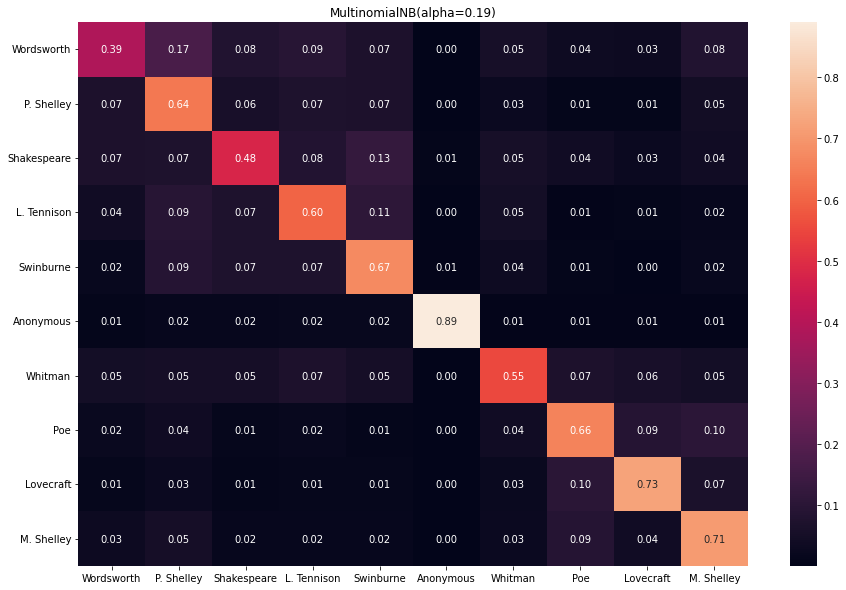

In [127]:
# define the Multinomial Naive Bayes model
MultinomialNB_model = MultinomialNB(alpha=0.17)

# train
MultinomialNB_model.fit(X_train, Y_train)

# predict
Y_pred = MultinomialNB_model.predict(X_test)

print(classification_report(Y_test, Y_pred, target_names=authors))

cm = confusion_matrix(Y_test, Y_pred)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(15,10))
ax.set_title('MultinomialNB(alpha=0.19)')
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=short_authors, yticklabels=short_authors)

                             precision    recall  f1-score   support

         William Wordsworth       0.35      0.31      0.33       616
       Percy Bysshe Shelley       0.44      0.28      0.35       664
        William Shakespeare       0.35      0.48      0.41       655
      Alfred, Lord Tennyson       0.52      0.44      0.48       707
 Algernon Charles Swinburne       0.42      0.51      0.46       683
                  Anonymous       0.82      0.82      0.82       690
               Walt Whitman       0.53      0.31      0.39       637
            Edgar Allan Poe       0.49      0.54      0.51       741
  Howard Phillips Lovecraft       0.55      0.60      0.57       743
Mary Wollstonecraft Shelley       0.51      0.59      0.54       759

                   accuracy                           0.50      6895
                  macro avg       0.50      0.49      0.49      6895
               weighted avg       0.50      0.50      0.49      6895



<AxesSubplot:title={'center':'GaussianNB'}>

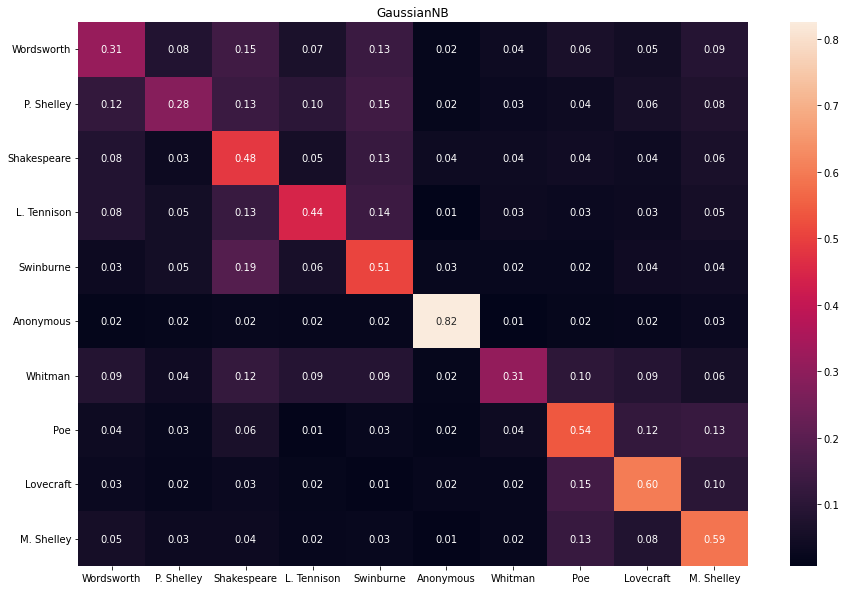

In [124]:
# define the Gaussian Naive Bayes model
GaussianNB_model = GaussianNB()

# train
GaussianNB_model.fit(X_train, Y_train)

# predict
Y_pred = GaussianNB_model.predict(X_test)

print(classification_report(Y_test, Y_pred, target_names=authors))

cm = confusion_matrix(Y_test, Y_pred)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(15,10))
ax.set_title('GaussianNB')
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=short_authors, yticklabels=short_authors)

The best performances in terms of macro-avg on semantic-annotated dataset are obtained by BernoulliNB(alpha=0.25) and MultinomialNB(alpha=0.17)